**Петров Кирилл**

Датасет: Данные сегментации изображения

[link](http://archive.ics.uci.edu/ml/datasets/image+segmentation)

## Лабораторная 1. Подготовка данных

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

Считываем исходный датасет

In [2]:
data = pd.read_csv('../../dataset/segmentation_train.data', sep = ',', engine = 'python')

Экземпляры были сделаны случайным образом из базы данных из 7 наружных изображений. Изображения были выделены вручную для создания классификации для каждого пикселя.

Каждый экземпляр представляет собой область 3x3.

По каждому образцу приведены следующие **признаки**:

1. region-centroid-col: столбец центрального пикселя области.
2. region-centroid-row: строка центрального пикселя области.
3. region-pixel-count: количество пикселей в области = 9.
4. short-line-density-5: результаты алгоритма экстракции линии, который подсчитывает, сколько строк длины 5 (любая ориентация) с низким контрастом, меньше или равным 5, проходит через область.
5. short-line-density-2: то же, что и плотность коротких строк-5, но подсчитывает линии с высокой контрастностью, более 5.
6. vedge-mean: измеряет контраст горизонтально смежных пикселей в области. Есть 6, среднее и стандартное отклонение. Этот атрибут используется как детектор вертикального края.
7. vegde-sd: (см. 6)
8. hedge-mean: измеряет контраст вертикально смежных пикселей. Используется для определения горизонтальной линии.
9. hdge-sd: (см. 8).
10. intensity-mean: среднее по области (R + G + B) / 3
11. raw-mean: среднее значение по области значения R.
12. rawblue-mean: среднее значение по области значения B.
13. rawgreen-mean: среднее значение по области значения G.
14. exred-mean: измерять избыток красного: (2R - (G + B))
15. exblue-mean: измерение избытка синего: (2B - (G + R))
16. exgreen-mean: измерять избыток зеленого: (2G - (R + B))
17. value-mean трехмерное нелинейное преобразование RGB. (Алгоритм можно найти в Foley и VanDam, «Основы интерактивной компьютерной графики»)
18. saturatoin-mean: (см. 17)
19. hue-mean: (см. 17)

#### Задача: 

Распознать принадлежноть к одному из классов: brickface, sky, foliage, cement, window, path, grass.


Посмотрим на наши данные:

In [3]:
data.head()

,CLASSES,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


И на основые характеристики

In [4]:
data.describe()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
count,210.000000,210.000000,210.0,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,124.647619,122.757143,9.0,0.008466,0.006349,1.925132,5.719529,2.604233,11.638377,37.091005,32.967725,44.011112,34.294180,-12.369841,20.760317,-8.390476,44.888360,0.423230,-1.340397
std,74.104024,58.139686,0.0,0.029549,0.030077,3.158211,43.495942,4.798268,97.390023,38.677168,35.540563,43.804447,37.057003,11.559599,18.761842,11.003746,43.235182,0.227333,1.559405
min,1.000000,11.000000,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-48.222220,-9.666667,-30.555555,0.000000,0.000000,-2.530950
25%,60.500000,81.500000,9.0,0.000000,0.000000,0.666667,0.400921,0.777779,0.410816,6.453704,7.000000,8.277778,3.805555,-18.111110,4.111111,-15.750000,10.527778,0.275722,-2.187112
50%,123.500000,121.500000,9.0,0.000000,0.000000,1.222222,0.828695,1.388889,0.913176,21.314816,18.611112,26.833334,20.000000,-10.333333,19.555556,-9.888889,28.388890,0.365455,-2.044163
75%,189.750000,174.500000,9.0,0.000000,0.000000,1.888890,1.676634,2.597221,1.980485,52.629629,46.750000,64.194447,46.472223,-4.666666,34.333332,-3.722222,64.194447,0.539738,-1.429800
max,252.000000,250.000000,9.0,0.111111,0.222222,25.500000,572.996400,44.722225,1386.329200,143.444440,136.888890,150.888890,142.555560,5.777778,78.777780,21.888890,150.888890,1.000000,2.864931


In [5]:
data.corr()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
REGION-CENTROID-COL,1.000000,0.081868,NaN,-0.109587,-0.113007,-0.079825,-0.089668,-0.077684,-0.066815,0.012867,0.009511,0.014851,0.013613,-0.041434,0.024445,0.001847,0.016348,-0.118124,0.050728
REGION-CENTROID-ROW,0.081868,1.000000,NaN,0.164906,0.022168,0.012171,-0.054820,0.034361,-0.036091,-0.470674,-0.476086,-0.480821,-0.448783,0.333223,-0.456954,0.429070,-0.460577,0.064391,0.597449
REGION-PIXEL-COUNT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SHORT-LINE-DENSITY-5,-0.109587,0.164906,NaN,1.000000,0.138629,-0.024825,-0.026879,-0.020419,-0.028937,0.004147,0.001105,-0.004500,0.017243,-0.031430,-0.057163,0.130483,0.004905,-0.064482,0.222568
SHORT-LINE-DENSITY-2,-0.113007,0.022168,NaN,0.138629,1.000000,0.373171,0.228926,0.397129,0.243559,0.075280,0.068163,0.090468,0.063399,-0.126925,0.168103,-0.153286,0.087356,-0.085369,-0.111372
VEDGE-MEAN,-0.079825,0.012171,NaN,-0.024825,0.373171,1.000000,0.582832,0.669766,0.530407,0.052579,0.040889,0.067472,0.045661,-0.150631,0.147422,-0.093121,0.065380,-0.090362,-0.108552
VEDGE-SD,-0.089668,-0.054820,NaN,-0.026879,0.228926,0.582832,1.000000,0.617712,0.947943,0.034435,0.026446,0.038993,0.036365,-0.101717,0.060155,0.004289,0.037604,-0.012146,-0.065279
HEDGE-MEAN,-0.077684,0.034361,NaN,-0.020419,0.397129,0.669766,0.617712,1.000000,0.677837,0.064138,0.054864,0.071328,0.063893,-0.137752,0.102944,-0.030813,0.069890,-0.132146,-0.097004
HEDGE-SD,-0.066815,-0.036091,NaN,-0.028937,0.243559,0.530407,0.947943,0.677837,1.000000,0.042568,0.036780,0.045261,0.044509,-0.088038,0.053767,0.000810,0.043803,-0.035948,-0.067504
INTENSITY-MEAN,0.012867,-0.470674,NaN,0.004147,0.075280,0.052579,0.034435,0.064138,0.042568,1.000000,0.998178,0.996216,0.996222,-0.830831,0.793341,-0.479878,0.997570,-0.620575,-0.348347


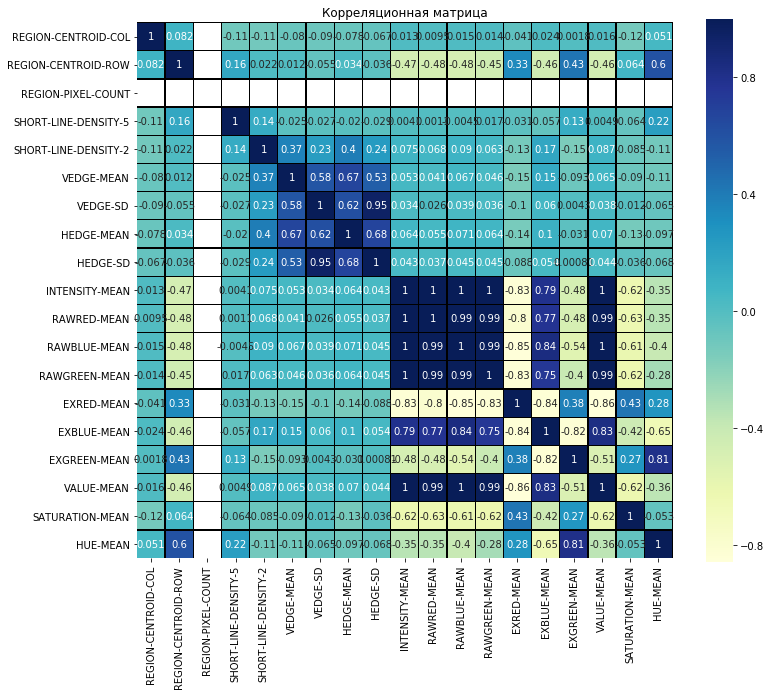

In [6]:
f, ax = plt.subplots(figsize=(12,10))
plt.title('Корреляционная матрица')
sns.heatmap(data.corr(), linewidths=0.25, vmax=1.0, square=True,
           cmap="YlGnBu", linecolor='black', annot=True)

Видно, что REGION-PIXEL-COUNT не несет никакой информации, а также заметны очень темные квадраты у многих не диагональных принаков. Это значит, что эти признаки очень схожи и не имеют особой полезной информации. Похорошему, чтоит от них избавиться.

## Обработка данных

REGION-PIXEL-COUNT очевидно выходит из схожести с остальными признаками. Остальные признаки по схожести с остальными признаками на первый взгляд и нет. Значения корреляционной матрицы далеки от 1. Кроме мат ожиданий различных каналов.

Поскольку нет перечисляемых признаков, нет пропущенных ячеек нет, достаточно удалить лишние данные и нормализовать оставшие признаки.

Заранее лучше отделить результат и сразу сопоставить конкретному классу индекс


Составляем словарь: название класса -> целое число

In [7]:
categories = data['CLASSES'].astype('category').cat.categories.tolist()
replace_map_comp = {k: v for k,v in zip(categories, list(range(len(categories))))}
print(replace_map_comp)

{'BRICKFACE': 0, 'CEMENT': 1, 'FOLIAGE': 2, 'GRASS': 3, 'PATH': 4, 'SKY': 5, 'WINDOW': 6}


Получаем итоговый **результат**:

In [8]:
label = [replace_map_comp[elem] for elem in data['CLASSES'].values]
print(label)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


По условию должно быть 30 штук на каждый класс, проверим с помощью гистограммы значений (можно придумать очень много способов проверки, но тут выбран именно этот):

In [9]:
print(np.histogram(label, range(8)))

(array([30, 30, 30, 30, 30, 30, 30], dtype=int64), array([0, 1, 2, 3, 4, 5, 6, 7]))


Продолжаем работу с признаками...

In [10]:
data = data.drop(['CLASSES'], axis=1)

1. Удаление ни на что невлияющего признака: **REGION-PIXEL-COUNT**, поскольку в условии данных строго указано, что размер изображений 3x3 *Each instance is a 3x3 region.*

In [11]:
data = data.drop(['REGION-PIXEL-COUNT'], axis=1)

Проверка

In [12]:
data.columns

Index(['REGION-CENTROID-COL', 'REGION-CENTROID-ROW', 'SHORT-LINE-DENSITY-5',
       'SHORT-LINE-DENSITY-2', 'VEDGE-MEAN', 'VEDGE-SD', 'HEDGE-MEAN',
       'HEDGE-SD', 'INTENSITY-MEAN', 'RAWRED-MEAN', 'RAWBLUE-MEAN',
       'RAWGREEN-MEAN', 'EXRED-MEAN', 'EXBLUE-MEAN', 'EXGREEN-MEAN',
       'VALUE-MEAN', 'SATURATION-MEAN', 'HUE-MEAN'],
      dtype='object')

#### 2. Нормализация

In [13]:
data = (data - data.mean(axis = 0))/data.std(axis = 0)

Проверка

In [14]:
data.describe()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,-1.057355e-18,3.436405e-16,4.467326e-17,5.709718e-17,9.595499e-17,-3.766828e-18,4.146815e-17,-3.542140e-17,5.022437e-17,1.411569e-16,2.067130e-16,6.626974e-16,-2.823139e-16,-1.765783e-16,4.504333e-16,-5.006577e-16,-1.718202e-18,5.413659e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.668568e+00,-1.922218e+00,-2.864987e-01,-2.110993e-01,-6.095641e-01,-1.314957e-01,-5.427443e-01,-1.195028e-01,-9.589897e-01,-9.276084e-01,-1.004718e+00,-9.254440e-01,-3.101524e+00,-1.621748e+00,-2.014321e+00,-1.038237e+00,-1.861717e+00,-7.634660e-01
25%,-8.656429e-01,-7.096210e-01,-2.864987e-01,-2.110993e-01,-3.984742e-01,-1.222783e-01,-3.806486e-01,-1.152845e-01,-7.921289e-01,-7.306503e-01,-8.157467e-01,-8.227493e-01,-4.966668e-01,-8.873972e-01,-6.688199e-01,-7.947366e-01,-6.488621e-01,-5.429727e-01
50%,-1.548660e-02,-2.162280e-02,-2.864987e-01,-2.110993e-01,-2.225659e-01,-1.124435e-01,-2.532880e-01,-1.101263e-01,-4.078941e-01,-4.039501e-01,-3.921469e-01,-3.857349e-01,1.761746e-01,-6.421342e-02,-1.361730e-01,-3.816214e-01,-2.541430e-01,-4.513041e-01
75%,8.785269e-01,8.899748e-01,-2.864987e-01,-2.110993e-01,-1.147567e-02,-9.294880e-02,-1.461266e-03,-9.916716e-02,4.017519e-01,3.877900e-01,4.607600e-01,3.286300e-01,6.663877e-01,7.234372e-01,4.242422e-01,4.465365e-01,5.124961e-01,-5.733129e-02
max,1.718562e+00,2.188571e+00,3.473796e+00,7.177375e+00,7.464626e+00,1.304206e+01,8.777749e+00,1.411531e+01,2.749773e+00,2.924016e+00,2.439884e+00,2.921482e+00,1.569918e+00,3.092312e+00,2.751733e+00,2.451719e+00,2.537111e+00,2.696751e+00


Действительно, видно, что получили нормализованный и готовый датасет.

In [15]:
data = data.values
print(data)

[[ 0.20717338  0.03857704 -0.28649868 ... -0.85834222  0.53843707
   0.14016825]
 [ 0.85491148  0.17617669 -0.28649868 ... -0.84292267  0.50740484
   0.26649905]
 [-0.26513566  0.27937642 -0.28649868 ... -0.86348207  0.48122152
   0.24012453]
 ...
 [ 0.97636238  1.9477721  -0.28649868 ... -0.60905965 -0.57405305
   2.64857202]
 [ 1.12480236  2.01657192  3.47379647 ... -0.60905965 -0.00707881
   2.39378715]
 [ 1.32722052  1.07057437 -0.28649868 ... -0.63218897  0.09760035
   2.03875593]]


#### 3. Уменьшение размерности
Попытаемся определить, сколько оставшихся столбцов несут полезной информации.

На корреляционной матрице найдем собственные значения

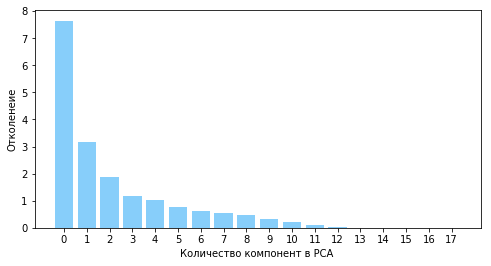

Собсственные значения: 
[7.64496353e+00 3.18323489e+00 1.87002972e+00 1.17651955e+00
 1.02394252e+00 7.62254690e-01 6.17251284e-01 5.45047975e-01
 4.84556381e-01 3.24748798e-01 2.30379240e-01 9.73644042e-02
 3.94536072e-02 2.53416841e-04 9.67920600e-16 4.27993181e-16
 3.19732998e-15 2.21936126e-15]


In [16]:
cor_mat2 = np.corrcoef(data.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

plt.figure(figsize=(8,4))
plt.bar(range(len(eig_vals)), eig_vals, color='lightskyblue')
plt.xlabel('Количество компонент в PCA ')
plt.ylabel('Отколенеие')
plt.xticks(range(len(eig_vals)))
plt.show()

print('Собсственные значения: \n%s' %eig_vals)

Как выбрать количество размерностей d? Умная книжка говорит, что достаточно соблюдение формулы:


\begin{align}
\sum_{i=1}^d \lambda_i > \gamma \sum_{i=1}^D \lambda_i \\
\end{align}

gamma - доля объясняемой дисперсии, пускай будет 0.99. Попробуем взять число компонент равным 14:



In [17]:
d = 14
gamma = 0.99
print('Сумма собственных чисел d компонент ', sum(eig_vals[:d]), 'Сумма всех собственных чисел ', sum(eig_vals))
sum(eig_vals[:d]) >= sum(eig_vals)*gamma

Сумма собственных чисел d компонент  18.000000000000014 Сумма всех собственных чисел  18.00000000000002


True

Ну вроде ок, означает, для достаточнй информации достаточно иметь 9 признаков. Подобные вычисления собственных чисел делает sklearn, но через SVD разложение. Можно увидеть подобную картину:

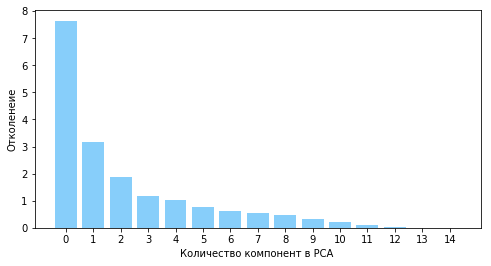

In [18]:
from sklearn.decomposition import PCA
pca = PCA(random_state=123)
pca.fit(data)
features = range(pca.n_components_)

plt.figure(figsize=(8,4))
plt.bar(features[:15], pca.explained_variance_[:15], color='lightskyblue')
plt.xlabel('Количество компонент в PCA ')
plt.ylabel('Отколенеие')
plt.xticks(features[:15])
plt.show()

Как видимо результаты схожи. Теперь можем получить обрезанные данные на основе получившихся результатов. Сдлеаем с помощью PCA sklearn

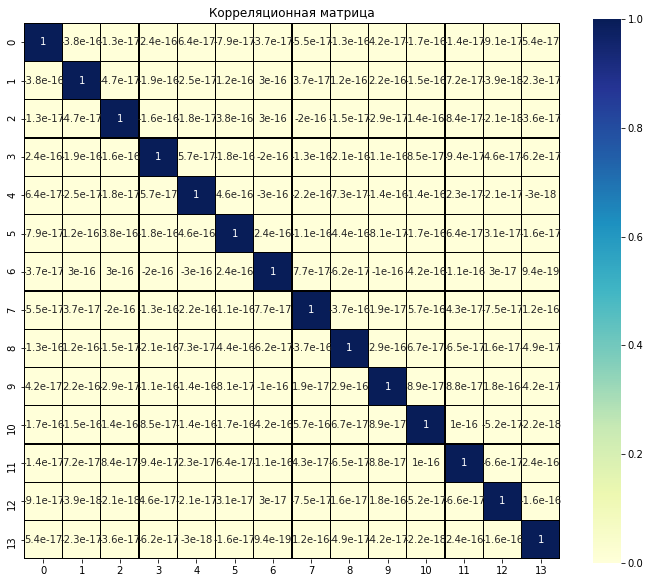

In [19]:
pca = PCA(n_components = d, random_state=123)
data = pca.fit_transform(data)

f, ax = plt.subplots(figsize=(12,10))
plt.title('Корреляционная матрица')
sns.heatmap(np.corrcoef(data.T), linewidths=0.25, vmax=1.0, square=True,
           cmap="YlGnBu", linecolor='black', annot=True)

Было 19 признаков а теперь 14. Вероятно ненужные нам признаки ушли и мы получили красивую корреляционную матрицу! PCA это круто

Данные для тренировки готовы. Извлекаем и готовим данные для тестирования аналогичным Способом.

In [20]:
data_train, label_train = data, label

In [21]:
data = pd.read_csv('../../dataset/segmentation_test.data', sep = ',', engine = 'python', header=None)

In [22]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,GRASS,110.0,189.0,9,0.0,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,GRASS,86.0,187.0,9,0.0,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,GRASS,225.0,244.0,9,0.0,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,GRASS,47.0,232.0,9,0.0,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,GRASS,97.0,186.0,9,0.0,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654


In [23]:
label = [replace_map_comp[elem] for elem in data[0].values]
print(np.histogram(label, range(8)))

(array([300, 300, 300, 300, 300, 300, 300], dtype=int64), array([0, 1, 2, 3, 4, 5, 6, 7]))


По условию должно быть 300 наблюдений для каждого класса, гистограмма это подтверждает.

In [24]:
data = data.drop([0, 3], axis=1)
data = (data - data.mean(axis = 0))/data.std(axis = 0)

In [25]:
data.describe().loc[['mean', 'std'], :]


,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
mean,-1.082641e-16,3.560115e-16,-2.962709e-16,2.411827e-16,-7.125253e-17,-2.245426e-16,8.770233e-16,8.238119e-17,3.676953e-16,-2.503870e-15,2.213943e-15,-1.415852e-15,3.118299e-15,8.352842e-16,-5.625262e-16,2.041647e-15,1.735371e-15,-2.170010e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


Обрезаем лишние признаки у тренировочного датасета

In [26]:
data = pca.transform(data)

Тестируемые и тренируемые датасеты готовы, проверим корректность размеров

In [27]:
data_test, label_test = data, label
data_test.shape[0] == len(label_test)

True

In [28]:
data_train.shape[0] == len(label_train)

True

В итоге размерности обучающей выборки

In [29]:
data_train.shape

(210, 14)

И размерности тестируемой выборки

In [30]:
data_test.shape

(2100, 14)

(На случай сохранения)

In [31]:
# np.savetxt("../dataset/data_train.csv", data_train, delimiter=",")
# np.savetxt("../dataset/data_test.csv", data_test, delimiter=",")
# np.savetxt("../dataset/label_test.csv", label_test, delimiter=",")
# np.savetxt("../dataset/label_train.csv", label_train, delimiter=",")

### Пример работы с алгоритмом kNN

Рассмотрим для примера один из простых методов классификации kNN с одним ближашим соседом

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1, algorithm='kd_tree')
knn.fit(data_train, label_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [33]:
y_train_predict = knn.predict(data_train)
y_test_predict = knn.predict(data_test)

err_train = np.mean(label_train != y_train_predict)
err_test  = np.mean(label_test  != y_test_predict)

print(err_train, err_test)

0.0 0.09523809523809523


Вообще, алгоритм классно справился, не зря он пользуется большой популярностью. Посмотрим, зависимость ошибки от числа соседей.

**Подбор параметров**

Минимум в тренировочной выборке  0.0  Минимум в тестовой выборке  0.09523809523809523


(100, 1)

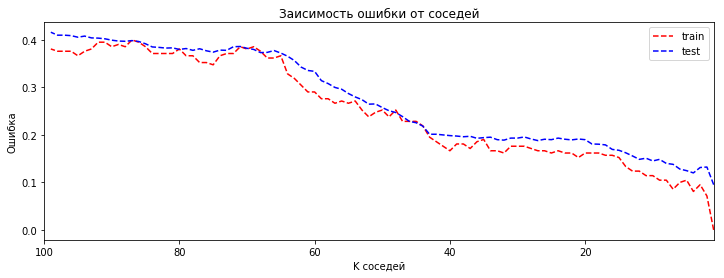

In [34]:
error_train = []
error_test = []
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors = i, algorithm='kd_tree')
    knn.fit(data_train, label_train)
    y_train_predict = knn.predict(data_train)
    y_test_predict = knn.predict(data_test)
    error_train.append(np.mean(label_train != y_train_predict))
    error_test.append(np.mean(label_test  != y_test_predict))

plt.figure(figsize=(12,4))
plt.plot(range(1,100), error_train, color='red', linestyle='dashed', label = 'train')
plt.plot(range(1,100), error_test, color='blue', linestyle='dashed', label = 'test')

print("Минимум в тренировочной выборке ", min(error_train), " Минимум в тестовой выборке ", min(error_test))

plt.title("Заисимость ошибки от соседей")
plt.xlabel("K соседей")
plt.ylabel("Ошибка")
plt.legend()
plt.xlim(100, 1)

Видно, что при росте числа соседей, ошибка ухудшается и на тестовой и на тренировочной выборке. Причем минимум достигается при ошибке 0.095 при одном соседе, что удивительно. И самые небольшие ошибки получаются при меньшим числе соседей. Посмотрим какое число соседей рекомендует функция GridSearchCV с методом кроссвалидации.

In [35]:
from sklearn.model_selection import GridSearchCV
nnb = list(range(1,100))
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(data_train, label_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print("Ошибка ", best_cv_err, "Количество соседей: ", best_n_neighbors)

Ошибка  0.12857142857142856 Количество соседей:  5


Кросс валидация дала нежели другой результат, чем который мы ожидали от графика выше. Можно этот эффект объяснить небольшим числа наблюдений в тренируемом датасете. Но ошибка близка к ошибки при тестовом примере (см. ниже). Можно сделать вывод, что это ошибка будет более устойчивая. Поэтому, для этого метода мы действительно ограничемся пятью соседами.

In [36]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(data_train, label_train)

y_train_predict = knn.predict(data_train)
y_test_predict = knn.predict(data_test)

err_train = np.mean(label_train != y_train_predict)
err_test  = np.mean(label_test  != y_test_predict)

print(err_train, err_test)

0.10476190476190476 0.12476190476190477


Итоговый результат на KNN будет 0.12 на тренировочном датасете

## Лабораторная 2. Полносвязная нейронная сеть

### Обучаем классификатор


In [37]:
from sklearn.neural_network import MLPClassifier

In [38]:
model = MLPClassifier(hidden_layer_sizes = (200, ), solver = 'lbfgs',
                          activation = 'tanh', random_state = 42)
model.fit(data_train, label_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

### Проверяем качество классификатора

Ошибки на обучающей и тестовой выборках:


In [39]:
print('Ошибка на обучающей выборки', 1 - model.score(data_train, label_train), 'Ошибка на тренировке ', 1 - model.score(data_test, label_test))

Ошибка на обучающей выборки 0.0 Ошибка на тренировке  0.09142857142857141


Ну немного переобучились, несмотря даже на то, что мы немного показываем лучше резулоьтат чем KNN. Попробуем перебирать параметры регулиризации и количество нейронов.


In [40]:
alpha_arr = np.logspace(-4, 2, 20)
test_err = []
train_err = []
for alpha in alpha_arr:
    model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (200, ), solver = 'lbfgs',
                          activation = 'tanh', random_state = 42)
    model.fit(data_train, label_train)

    y_train_pred = model.predict(data_train)
    y_test_pred = model.predict(data_test)
    train_err.append(np.mean(y_train_pred != label_train))
    test_err.append(np.mean(y_test_pred != label_test))
    

Минимум в тренировочной выборке  0.0  Минимум в тестовой выборке  0.07095238095238095
Оптимальный альфа  0.007847599703514606


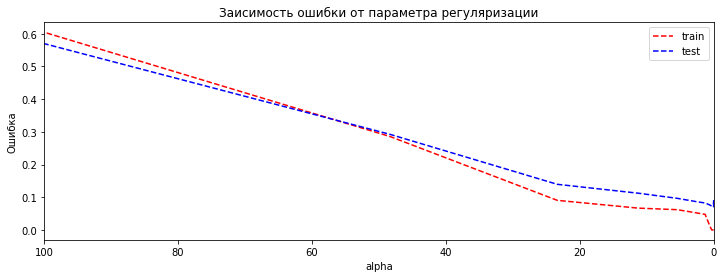

In [41]:
plt.figure(figsize=(12,4))
plt.plot(alpha_arr, train_err, color='red', linestyle='dashed', label = 'train')
plt.plot(alpha_arr, test_err, color='blue', linestyle='dashed', label = 'test')

plt.title("Заисимость ошибки от параметра регуляризации")
plt.xlabel("alpha")
plt.ylabel("Ошибка")
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.legend()
         
print("Минимум в тренировочной выборке ", min(train_err), " Минимум в тестовой выборке ", min(test_err))
alpha_opt = alpha_arr[test_err == min(test_err)][0]
print("Оптимальный альфа ", alpha_opt)


Мы опять немного переобучаемся, но ошибка <8%. Лучше, но не сильно. Также можно заметить, что увеличение регулиризации заметно ухудшает качество предсказаний и на обучающей выборке и на тестовой.

Посмотрим, что происхоодит при переборе количетсва нейронов при оптимальном найденном параметре регулиризации

In [42]:
layer_sizes_arr = np.linspace(1, 300, 10, dtype=int)
test_err = []
train_err = []
for layer_sizes in layer_sizes_arr:
    model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (layer_sizes, ), solver = 'lbfgs',
                          activation = 'tanh', random_state = 42)
    model.fit(data_train, label_train)

    y_train_pred = model.predict(data_train)
    y_test_pred = model.predict(data_test)
    train_err.append(np.mean(y_train_pred != label_train))
    test_err.append(np.mean(y_test_pred != label_test))

Минимум в тренировочной выборке  0.0  Минимум в тестовой выборке  0.07095238095238095
Оптимальное количество нейронов  200


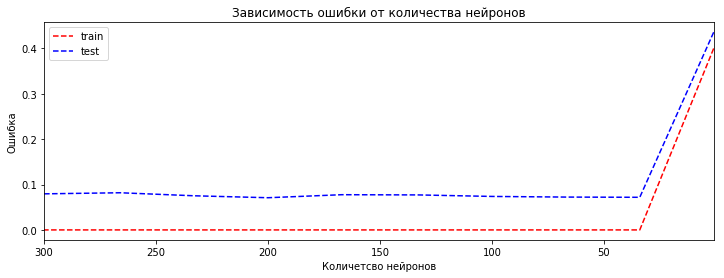

In [43]:
plt.figure(figsize=(12,4))
plt.plot(layer_sizes_arr, train_err, color='red', linestyle='dashed', label = 'train')
plt.plot(layer_sizes_arr, test_err, color='blue', linestyle='dashed', label = 'test')

plt.title("Зависимость ошибки от количества нейронов")
plt.xlabel("Количетсво нейронов")
plt.ylabel("Ошибка")
plt.xlim([np.max(layer_sizes_arr), np.min(layer_sizes_arr)])
plt.legend()

print("Минимум в тренировочной выборке ", min(train_err), " Минимум в тестовой выборке ", min(test_err))
layer_sizes_opt = layer_sizes_arr[test_err == min(test_err)][0]
print("Оптимальное количество нейронов ", layer_sizes_opt)

Видно, что достаточно небольшое количестов нейронов для хорошего результата. Ошибка на тренировочной выборке очень быстро свелась к нулевой, однако на тестовой, продолжает колебаться вокруг своего оптимума, не сильно при этом изменяесь. Как не удивительно, но оптимум совпал со значением по умолчанию.

### Метрики качества

Повторим обучение на оптимально найденных гиперпараметрах и посмотрим на некоторые характеристики

In [44]:
model = MLPClassifier(hidden_layer_sizes = (layer_sizes_opt, ), alpha = alpha_opt, solver = 'lbfgs',
                          activation = 'tanh', random_state = 42)
model.fit(data_train, label_train)

y_train_pred = model.predict(data_train)
y_test_pred = model.predict(data_test)

from sklearn.metrics import classification_report
print(classification_report(label_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.96      0.95      0.95       300
          1       0.87      0.89      0.88       300
          2       0.88      0.87      0.87       300
          3       1.00      0.99      0.99       300
          4       0.96      1.00      0.98       300
          5       1.00      1.00      1.00       300
          6       0.83      0.81      0.82       300

avg / total       0.93      0.93      0.93      2100



[[284   4   0   0   0   0   9]
 [ 14 267   6   0   1   0  18]
 [  0   5 260   1   0   0  29]
 [  0   0   0 297   0   0   0]
 [  0  10   0   2 299   0   0]
 [  0   0   0   0   0 300   0]
 [  2  14  34   0   0   0 244]]


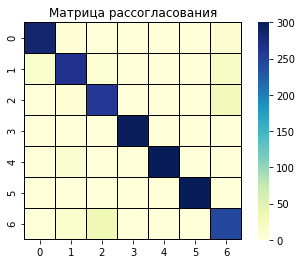

In [45]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, label_test))

plt.title('Матрица рассогласования')
sns.heatmap(confusion_matrix(y_test_pred, label_test), linewidths=0.25, square=True,
           cmap="YlGnBu", linecolor='black')

В целом видно идеальное предстказывание к некоторым классам. Например классфикатор точно определяет "путь" и "цемент". Путает немного "траву" с "листвой", что в принцепи, немного ожидаемо. Так что в целом можно сказать, что классификатор хорошо отработал. Посмотрим как покажут себя другие классификаторы :)

## Лабораторная 3. Решающие деревья

In [46]:
import warnings; warnings.simplefilter('ignore')

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

Начнем знакомство с самого ядра всего это добра - решающего дерева

### Decision Trees

In [47]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=None)
model.fit(data_train, label_train)

print('Ошибка на обучающей выборки', 1 - model.score(data_train, label_train))
print('Ошибка на тренировке ', 1 - model.score(data_test, label_test))


Ошибка на обучающей выборки 0.0
Ошибка на тренировке  0.15809523809523807


Ожидаемо было переобучиться, с учетом того, что мы строили неограниченное деревою

In [48]:
max_depth_arr = np.linspace(1, 20, 20, dtype=int)
test_err = []
train_err = []
for max_depth in max_depth_arr:
    model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    model.fit(data_train, label_train)

    train_err.append(1 - model.score(data_train, label_train))
    test_err.append(1 - model.score(data_test, label_test))

Минимум в тренировочной выборке  0.0  Минимум в тестовой выборке  0.14476190476190476
Оптимальная глубинав 16


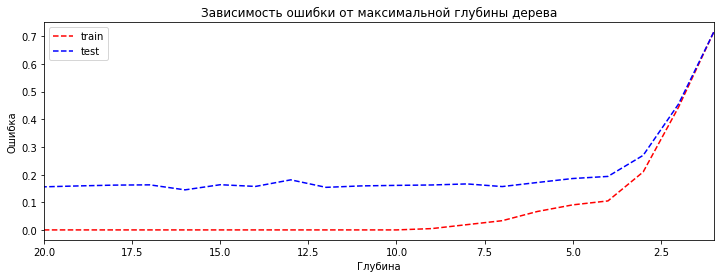

In [49]:
plt.figure(figsize=(12,4))
plt.plot(max_depth_arr, train_err, color='red', linestyle='dashed', label = 'train')
plt.plot(max_depth_arr, test_err, color='blue', linestyle='dashed', label = 'test')

plt.title("Зависимость ошибки от максимальной глубины дерева")
plt.xlabel("Глубина")
plt.ylabel("Ошибка")
plt.xlim([np.max(max_depth_arr), np.min(max_depth_arr)])
plt.legend()

print("Минимум в тренировочной выборке ", min(train_err), " Минимум в тестовой выборке ", min(test_err))
max_depth_opt = max_depth_arr[test_err == min(test_err)][0]
print("Оптимальная глубинав", max_depth_opt)

Особо ситация не улучшается при увеличении глубины на тестовой выборке, только улучшается результат на тренировочной выборке. Собственно полезного тут мало. Но есть небольшая информация о допустимых ограничений глубины дерева. Видно, что глубже 10 смысла брать нет. Используем это для дальнейшего

### Random Forest

Был выбор из sklearn над тем, сколько максимум признаков будем разбивать в каждом сплите между sqrt, log2 или вообще оставлять все фитчи, но поскольку:

In [50]:
import math
print(math.log2(d))
int(math.log2(d)) == int(math.sqrt(d))

3.807354922057604


True

Посмотрим на разницу лесов log2, без ограничений выбора и нейтральное: зафиксируем число 8

In [52]:
import matplotlib.pyplot as plt

import warnings; warnings.simplefilter('ignore')

from collections import OrderedDict
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

RANDOM_STATE = 123

ensemble_clfs = [
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(max_features='log2',
                               oob_score=True,
                               max_depth=10,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(max_depth=10,
                               oob_score=True,
                               max_features=None,
                               random_state=RANDOM_STATE)),
     ("RandomForestClassifier, max_features=8",
        RandomForestClassifier(max_depth=10,
                               oob_score=True,
                               max_features=8,
                               random_state=RANDOM_STATE))
]

estimators_array = np.linspace(1, 200, 30, dtype=int)

error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)
train_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)
test_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

for label, model in ensemble_clfs:
    for i in estimators_array:
        model.set_params(n_estimators=i)
        model.fit(data_train, label_train)

        oob_error = 1 - model.oob_score_
        error_rate[label].append((i, oob_error))
        
        train_error = 1 - model.score(data_train, label_train)
        train_rate[label].append((i, train_error))
        
        test_error = 1 - model.score(data_test, label_test)
        test_rate[label].append((i, test_error))

Минимум Train  RandomForestClassifier, max_features='log2'    0.0
Минимум Train  RandomForestClassifier, max_features=None    0.0
Минимум Train  RandomForestClassifier, max_features=8    0.0

Минимум Test  RandomForestClassifier, max_features='log2'    0.08857142857142852
Минимум Test  RandomForestClassifier, max_features=None    0.12047619047619051
Минимум Test  RandomForestClassifier, max_features=8    0.11190476190476195

Минимум OOb  RandomForestClassifier, max_features='log2'    0.1333333333333333
Минимум OOb  RandomForestClassifier, max_features=None    0.12380952380952381
Минимум OOb  RandomForestClassifier, max_features=8    0.11904761904761907


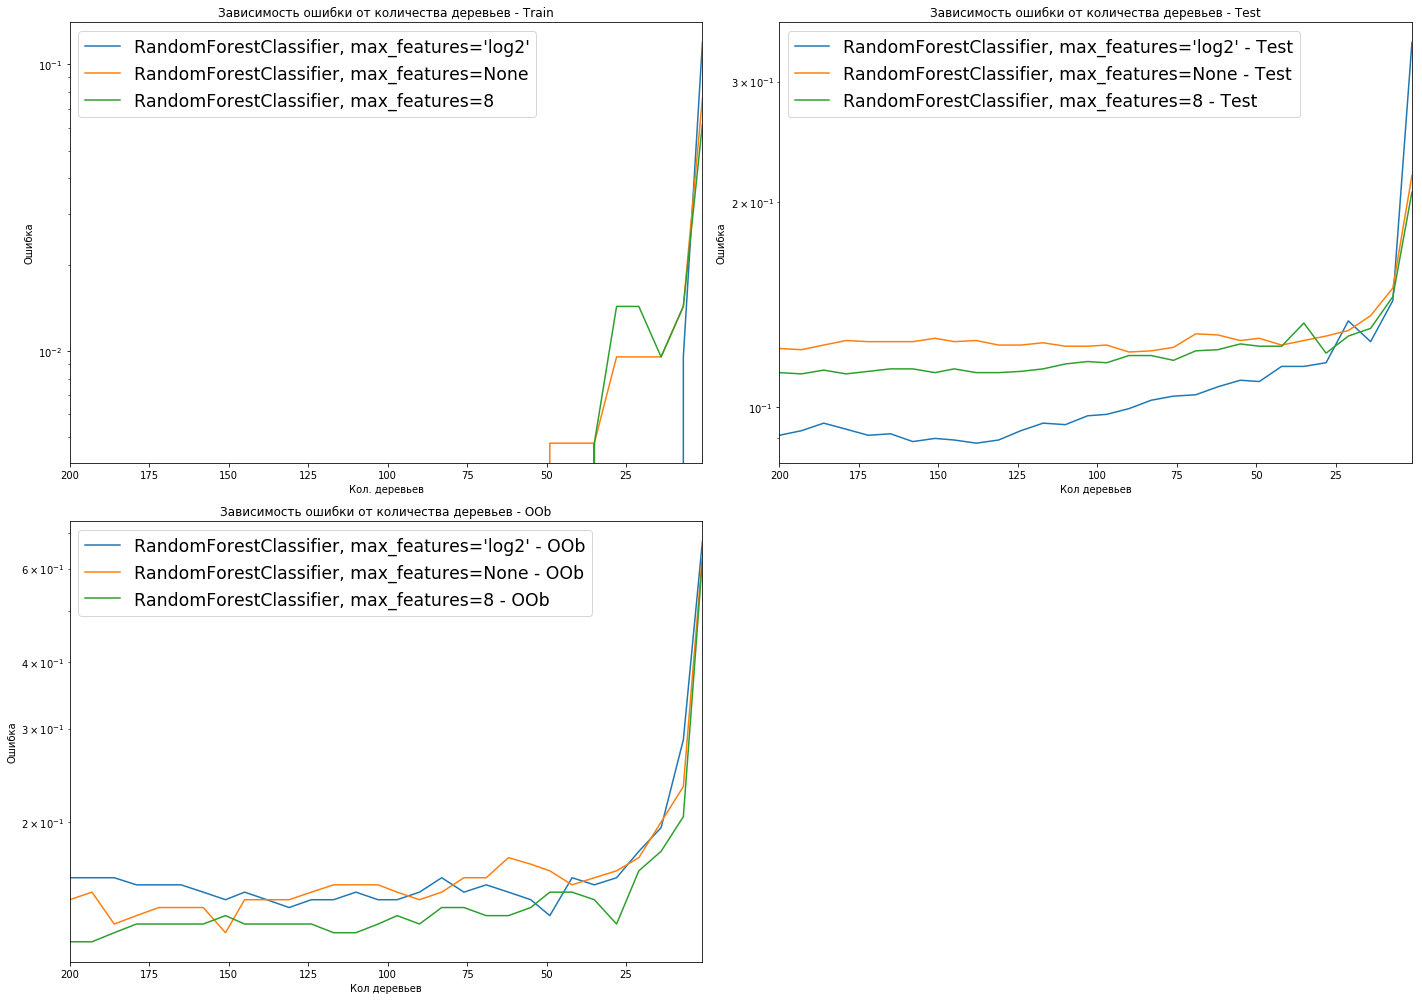

In [53]:
fig = plt.figure(figsize=(20,14))

ax = fig.add_subplot(221)

for label, clf_err in train_rate.items():
    xs, ys = zip(*clf_err)
    ax.plot(xs, ys, label=label)
    print("Минимум Train ", label, "  ", min(ys))

    
ax.set_title("Зависимость ошибки от количества деревьев - Train")
ax.set_xlabel("Кол. деревьев")
ax.set_ylabel("Ошибка")
ax.set_xlim([np.max(estimators_array), np.min(estimators_array)])
ax.legend(loc="upper left", fontsize='xx-large')
ax.set_yscale('log')

print()

ax = fig.add_subplot(222)
for label, clf_err in test_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label + ' - Test')
    print("Минимум Test ", label, "  ", min(ys))

    
ax.set_title("Зависимость ошибки от количества деревьев - Test")
ax.set_xlabel("Кол деревьев")
ax.set_ylabel("Ошибка")
ax.set_xlim([np.max(estimators_array), np.min(estimators_array)])
ax.legend(loc="upper left", fontsize='xx-large')
ax.set_yscale('log')

print()

ax = fig.add_subplot(223)
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label + ' - OOb')
    print("Минимум OOb ", label, "  ", min(ys))

    
ax.set_title("Зависимость ошибки от количества деревьев - OOb")
ax.set_xlabel("Кол деревьев")
ax.set_ylabel("Ошибка")
ax.set_xlim([np.max(estimators_array), np.min(estimators_array)])
ax.legend(loc="upper left", fontsize='xx-large')
ax.set_yscale('log')

plt.tight_layout() 

На тренировочной выборке при любом разбиении очень быстро устремляются к 0, но при этом также хорошо устрется ошибка на тренировочной выборке и даже OOB ошибка. Когда лес представлен как баггинг, он достигает своего предела и ошибка лучше не становится. При рандомизации выбора признаков, видны лучшие результаты при меньшем множестве признаков. Но ошибка OOB как можно видеть хуже, но это можно объяснить тем, что бутстрэп-выборка при этом намного больше.

Подберем гипер-параметры GridSearchCV на основе вышеполученных графиков

In [54]:
rf_hyperparameters = {
    "n_estimators": [20, 80, 160, 175],
    "max_features": [2, "log2", 8],
    "max_depth": [5, 7, 10]
}

In [55]:
estimation = RandomForestClassifier(oob_score=True,
                       random_state=RANDOM_STATE)
model = GridSearchCV(estimation, rf_hyperparameters, cv=10)
model.fit(data_train, label_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=123, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [20, 80, 160, 175], 'max_features': [2, 'log2', 8], 'max_depth': [5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [56]:
print('Ошибка на обучающей выборки', 1 - model.score(data_train, label_train))
print('Ошибка на тренировке ', 1 - model.score(data_test, label_test))

Ошибка на обучающей выборки 0.00952380952380949
Ошибка на тренировке  0.13047619047619052


In [57]:
model.best_params_

{'max_depth': 7, 'max_features': 'log2', 'n_estimators': 20}

### Extremely Randomized Trees

In [58]:
from sklearn.ensemble import ExtraTreesClassifier

RANDOM_STATE = 123

ensemble_clfs = [
    ("ExtraTreesClassifier, max_features='log2'",
        ExtraTreesClassifier(max_features='log2',
                               max_depth=8,
                               random_state=RANDOM_STATE)),
    ("ExtraTreesClassifier, max_features=None",
        ExtraTreesClassifier(max_depth=8,
                               max_features=None,
                               random_state=RANDOM_STATE)),
    ("ExtraTreesClassifier, max_features=8",
        ExtraTreesClassifier(max_depth=8,
                               max_features=8,
                               random_state=RANDOM_STATE)),
]

estimators_array = np.linspace(1, 200, 40, dtype=int)

train_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)
test_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

for label, model in ensemble_clfs:
    for i in estimators_array:
        model.set_params(n_estimators=i)
        model.fit(data_train, label_train)

        
        train_error = 1 - model.score(data_train, label_train)
        train_rate[label].append((i, train_error))
        
        test_error = 1 - model.score(data_test, label_test)
        test_rate[label].append((i, test_error))

Минимум Train  ExtraTreesClassifier, max_features='log2'    0.004761904761904745
Минимум Train  ExtraTreesClassifier, max_features=None    0.0
Минимум Train  ExtraTreesClassifier, max_features=8    0.0

Минимум Test  ExtraTreesClassifier, max_features='log2'    0.08238095238095233
Минимум Test  ExtraTreesClassifier, max_features=None    0.07904761904761903
Минимум Test  ExtraTreesClassifier, max_features=8    0.08380952380952378



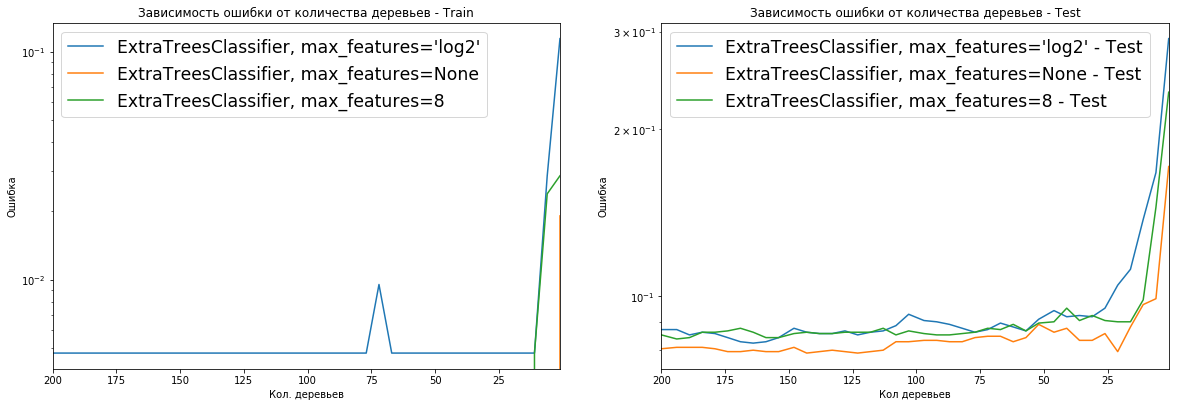

In [59]:
fig = plt.figure(figsize=(20,14))

ax = fig.add_subplot(221)

for label, clf_err in train_rate.items():
    xs, ys = zip(*clf_err)
    ax.plot(xs, ys, label=label)
    print("Минимум Train ", label, "  ", min(ys))

    
ax.set_title("Зависимость ошибки от количества деревьев - Train")
ax.set_xlabel("Кол. деревьев")
ax.set_ylabel("Ошибка")
ax.set_xlim([np.max(estimators_array), np.min(estimators_array)])
ax.legend(loc="upper left", fontsize='xx-large')
ax.set_yscale('log')

print()

ax = fig.add_subplot(222)
for label, clf_err in test_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label + ' - Test')
    print("Минимум Test ", label, "  ", min(ys))

    
ax.set_title("Зависимость ошибки от количества деревьев - Test")
ax.set_xlabel("Кол деревьев")
ax.set_ylabel("Ошибка")
ax.set_xlim([np.max(estimators_array), np.min(estimators_array)])
ax.legend(loc="upper left", fontsize='xx-large')
ax.set_yscale('log')

print()

OOB ошибку посмотреть уже не можем, поскольку мы не используем бутсрэп-выборку. В этот раз ситуация сильно изменилась, теперь наоборот, больше признаков используем, тем лучше. В целом поведении ошибок повторяется с Random Forest, но при этом качество оказалось лучше. Тут далже где-то ошибка получилась **0.079** на тестовой выборке!

In [60]:
ex_hyperparameters = {
    "n_estimators": [20, 18, 125, 170],
    "max_features": ["log2", 8, None],
    "max_depth": [5, 8, 10]
}

In [61]:
estimation = ExtraTreesClassifier(oob_score=True, bootstrap=True, random_state=RANDOM_STATE)
model = GridSearchCV(estimation, ex_hyperparameters, cv=10)
model.fit(data_train, label_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=ExtraTreesClassifier(bootstrap=True, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=True, random_state=123, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [20, 18, 125, 170], 'max_features': ['log2', 8, None], 'max_depth': [5, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [62]:
print('Ошибка на обучающей выборки', 1 - model.score(data_train, label_train))
print('Ошибка на тренировке ', 1 - model.score(data_test, label_test))

Ошибка на обучающей выборки 0.00952380952380949
Ошибка на тренировке  0.11285714285714288


In [63]:
model.best_params_

{'max_depth': 10, 'max_features': 8, 'n_estimators': 18}

## AdaBoostClassifier

Тут помимо количества деревьев интересно посмотреть на разлинчые классификаторы. Возьмем **пенёк** (дерево с глубиной один), полноценное **дерево** с глубиной десять, случайный **лес** и мультиклассовую **логистическую регрессию** ну а почему бы и нет)

In [64]:
import matplotlib.pyplot as plt

import warnings; warnings.simplefilter('ignore')

from collections import OrderedDict
from sklearn.linear_model import LogisticRegression

RANDOM_STATE = 123

d_stump = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=RANDOM_STATE)
d_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=RANDOM_STATE)
d_forest = RandomForestClassifier(max_features='log2', max_depth=10, random_state=RANDOM_STATE)
log_reg = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=RANDOM_STATE)

learning_rate = 0.6

ensemble_clfs = [
    ("AdaBoostClassifier, base_estimator is stump",
        AdaBoostClassifier(
                base_estimator=d_stump,
                learning_rate=learning_rate,
                algorithm="SAMME",
                random_state=RANDOM_STATE)),
    ("AdaBoostClassifier, base_estimator is tree (depth = 10)",
        AdaBoostClassifier(
                base_estimator=d_tree,
                learning_rate=learning_rate,
                algorithm="SAMME",
                random_state=RANDOM_STATE)),
    ("AdaBoostClassifier, base_estimator is forest",
        AdaBoostClassifier(
                base_estimator=d_forest,
                learning_rate=learning_rate,
                algorithm="SAMME",
                random_state=RANDOM_STATE)),
    ("AdaBoostClassifier, base_estimator is logistic regression",
        AdaBoostClassifier(
                base_estimator=log_reg,
                learning_rate=learning_rate,
                algorithm="SAMME",
                random_state=RANDOM_STATE)),
]

estimators_array = np.linspace(1, 50, 20, dtype=int)
train_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)
test_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

for label, model in ensemble_clfs:
    for i in estimators_array:
        model.set_params(n_estimators=i)
        model.fit(data_train, label_train)
        
        train_error = 1 - model.score(data_train, label_train)
        train_rate[label].append((i, train_error))
        
        test_error = 1 - model.score(data_test, label_test)
        test_rate[label].append((i, test_error))

Минимум Train  AdaBoostClassifier, base_estimator is stump    0.22857142857142854
Минимум Train  AdaBoostClassifier, base_estimator is tree (depth = 10)    0.0
Минимум Train  AdaBoostClassifier, base_estimator is forest    0.0
Минимум Train  AdaBoostClassifier, base_estimator is logistic regression    0.17619047619047623

Минимум Test  AdaBoostClassifier, base_estimator is stump    0.27809523809523806
Минимум Test  AdaBoostClassifier, base_estimator is tree (depth = 10)    0.17095238095238097
Минимум Test  AdaBoostClassifier, base_estimator is forest    0.12238095238095237
Минимум Test  AdaBoostClassifier, base_estimator is logistic regression    0.20285714285714285


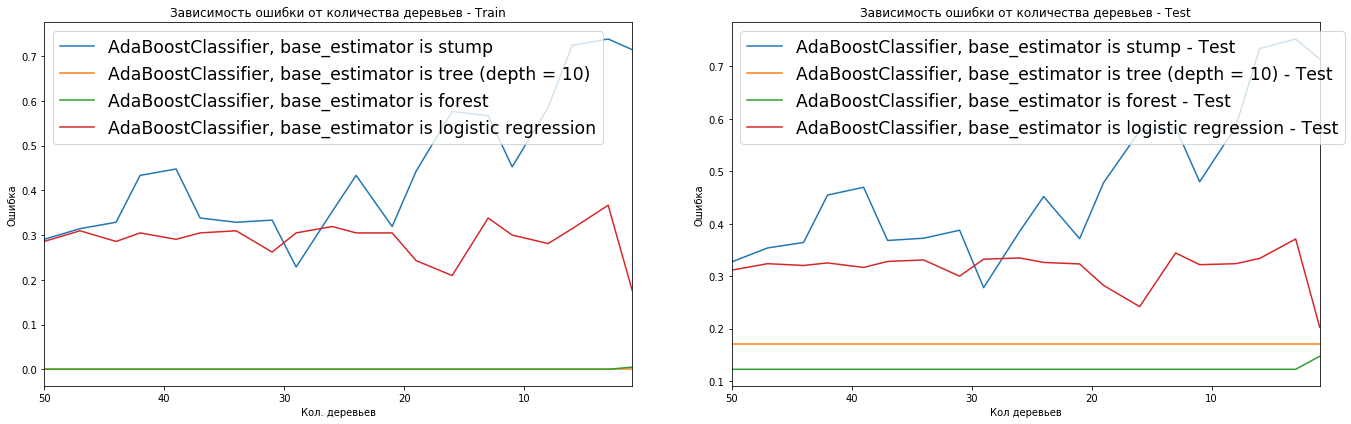

In [65]:
fig = plt.figure(figsize=(20,6))

ax = fig.add_subplot(121)

for label, clf_err in train_rate.items():
    xs, ys = zip(*clf_err)
    ax.plot(xs, ys, label=label)
    print("Минимум Train ", label, "  ", min(ys))

    
ax.set_title("Зависимость ошибки от количества деревьев - Train")
ax.set_xlabel("Кол. деревьев")
ax.set_ylabel("Ошибка")
ax.set_xlim([np.max(estimators_array), np.min(estimators_array)])
ax.legend(loc="upper left", fontsize='xx-large')
# ax.set_yscale('log')

print()

ax = fig.add_subplot(122)
for label, clf_err in test_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label + ' - Test')
    print("Минимум Test ", label, "  ", min(ys))

    
ax.set_title("Зависимость ошибки от количества деревьев - Test")
ax.set_xlabel("Кол деревьев")
ax.set_ylabel("Ошибка")
ax.set_xlim([np.max(estimators_array), np.min(estimators_array)])
ax.legend(loc="upper left", fontsize='xx-large')
# ax.set_yscale('log')

plt.tight_layout() 

Для моих данных, судя по всему алгоритм слишком быстро сошёлся. Ну не считая пенечка, там все плохо и видимо останется плохо и на 1000 итераций. Дерево и лес дают одинаковую оценку и для тренировки и для тестовой выборки. Логистическая регрессия тут ведет себя очень своебразно, ну хотя бы лучше пенька и на том спасибо

Подберем гипер-параметры GridSearchCV на основе вышеполученных графиков. Оставим только случайный лес.

In [66]:
d_forest = RandomForestClassifier(max_features='log2', max_depth=10, random_state=RANDOM_STATE),

ada_hyperparameters = {
    "n_estimators": [1, 5, 10, 15],
    "learning_rate": [1, 0.5, 0.75],
    "algorithm": ["SAMME", "SAMME.R"]
}

In [67]:
estimation = AdaBoostClassifier(base_estimator=d_tree)
model = GridSearchCV(estimation, ada_hyperparameters, cv=10)
model.fit(data_train, label_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 5, 10, 15], 'learning_rate': [1, 0.5, 0.75], 'algorithm': ['SAMME', 'SAMME.R']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [68]:
print('Ошибка на обучающей выборки', 1 - model.score(data_train, label_train))
print('Ошибка на тренировке ', 1 - model.score(data_test, label_test))

Ошибка на обучающей выборки 0.0
Ошибка на тренировке  0.16380952380952385


In [69]:
model.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 5}

Можно сделать вывод, что AdaBoost как то не зашел моему датасету. Очень плохие результаты (относитеьно других алгоритмов). Не беда, впереди XGB, надеюсь он отомстит за весь род бустиногов.

### XGBoost

In [70]:
import xgboost as xgb

Один из самых больших алгоритмов, которые я видел. Очень много настроек и интересных конфигураций. К сожалению, функции ошибок перебирать не будем, это очень не интересно *(проверял, вообще никакой раззницы, к тому же очень ограниченный выбор функций для мультикласса)*. Поэтому начнем с процента взятия выборки (**subsample**)

In [71]:
learning_rate = 0.5
max_depth = 10
lambda_reg = 0.1

params = {'silent': 1}

params["eta"] = learning_rate
params["max_depth"] = max_depth
params["lambda"] = lambda_reg
params["tree_method"] = "exact"
params["predictor"] = "cpu_predictor"
params["min_child_weight"] = 1
params["objective"] = "multi:softmax"

ensemble_clfs = [
    ("XGBClassifier, objective 0.25 subsample",
        xgb.XGBClassifier(
                subsample=0.5,
                random_state=RANDOM_STATE,
                **params)
    ),
    ("XGBClassifier, objective 0.65 subsample",
        xgb.XGBClassifier(
                subsample=0.65,
                random_state=RANDOM_STATE,
                **params)
    ),
    ("XGBClassifier, 0.85 subsample",
        xgb.XGBClassifier(
                subsample=0.85,
                random_state=RANDOM_STATE,
                **params)
    ),
    ("XGBClassifier, full sample",
        xgb.XGBClassifier(
                subsample=1,
                random_state=RANDOM_STATE,
                **params)
    ),
]

estimators_array = np.linspace(1, 200, 50, dtype=int)
train_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)
test_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

for label, model in ensemble_clfs:
    for i in estimators_array:
        model.set_params(n_estimators=i)
        model.fit(data_train, label_train)
        
        train_error = 1 - model.score(data_train, label_train)
        train_rate[label].append((i, train_error))
        
        test_error = 1 - model.score(data_test, label_test)
        test_rate[label].append((i, test_error))


Минимум Train  XGBClassifier, objective 0.25 subsample    0.0
Минимум Train  XGBClassifier, objective 0.65 subsample    0.0
Минимум Train  XGBClassifier, 0.85 subsample    0.0
Минимум Train  XGBClassifier, full sample    0.0

Минимум Test  XGBClassifier, objective 0.25 subsample    0.10428571428571431
Минимум Test  XGBClassifier, objective 0.65 subsample    0.10238095238095235
Минимум Test  XGBClassifier, 0.85 subsample    0.09904761904761905
Минимум Test  XGBClassifier, full sample    0.10809523809523813


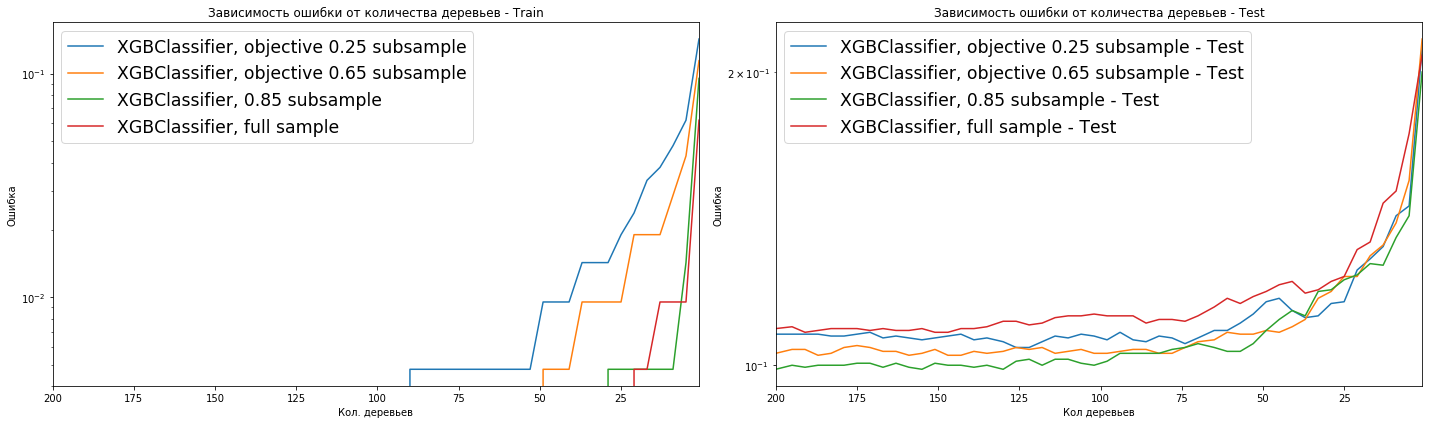

In [72]:
fig = plt.figure(figsize=(20,6))

ax = fig.add_subplot(121)

for label, clf_err in train_rate.items():
    xs, ys = zip(*clf_err)
    ax.plot(xs, ys, label=label)
    print("Минимум Train ", label, "  ", min(ys))

    
ax.set_title("Зависимость ошибки от количества деревьев - Train")
ax.set_xlabel("Кол. деревьев")
ax.set_ylabel("Ошибка")
ax.set_xlim([np.max(estimators_array), np.min(estimators_array)])
ax.legend(loc="upper left", fontsize='xx-large')
ax.set_yscale('log')

print()

ax = fig.add_subplot(122)
for label, clf_err in test_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label + ' - Test')
    print("Минимум Test ", label, "  ", min(ys))

    
ax.set_title("Зависимость ошибки от количества деревьев - Test")
ax.set_xlabel("Кол деревьев")
ax.set_ylabel("Ошибка")
ax.set_xlim([np.max(estimators_array), np.min(estimators_array)])
ax.legend(loc="upper left", fontsize='xx-large')
ax.set_yscale('log')

plt.tight_layout() 

Самые очевидные выводы - алгоритм хорош :) Переобучения явного не происходит, быстро сходится к минимуму и дает в целом неплохие результаты *(хотя не так и круто, по сравнению с теми же лесами)*. Интересно, что мы намного меньше получаем ошибку, не используя всю выборку, самым эффективным вариантом тут видно, если использовать 85%.

Интересно посмотреть, как влияет на качество глубина деревьев. Зафиксируем subsample

In [73]:
learning_rate = 0.5
lambda_reg = 0.1

params = {'silent': 1}

params["eta"] = learning_rate
params["lambda"] = lambda_reg
params["tree_method"] = "exact"
params["predictor"] = "cpu_predictor"
params["min_child_weight"] = 1
params["objective"] = "multi:softmax"

ensemble_clfs = [
    ("XGBClassifier, max depth = 1",
        xgb.XGBClassifier(
                max_depth=1,
                subsample=0.85,
                random_state=RANDOM_STATE,
                **params)
    ),
    ("XGBClassifier, max depth = 5",
        xgb.XGBClassifier(
                subsample=0.85,
                max_depth = 5,
                random_state=RANDOM_STATE,
                **params)
    ),
    ("XGBClassifier, max depth = 7",
        xgb.XGBClassifier(
                subsample=0.85,
                max_depth = 7,
                random_state=RANDOM_STATE,
                **params)
    ),
    ("XGBClassifier, max depth = 10",
        xgb.XGBClassifier(
                subsample=0.85,
                max_depth = 10,
                random_state=RANDOM_STATE,
                **params)
    ),
]

estimators_array = np.linspace(1, 100, 40, dtype=int)
train_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)
test_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

for label, model in ensemble_clfs:
    for i in estimators_array:
        model.set_params(n_estimators=i)
        model.fit(data_train, label_train)
        
        train_error = 1 - model.score(data_train, label_train)
        train_rate[label].append((i, train_error))
        
        test_error = 1 - model.score(data_test, label_test)
        test_rate[label].append((i, test_error))

Минимум Train  XGBClassifier, max depth = 1    0.02857142857142858
Минимум Train  XGBClassifier, max depth = 5    0.0
Минимум Train  XGBClassifier, max depth = 7    0.0
Минимум Train  XGBClassifier, max depth = 10    0.0

Минимум Test  XGBClassifier, max depth = 1    0.12238095238095237
Минимум Test  XGBClassifier, max depth = 5    0.10190476190476194
Минимум Test  XGBClassifier, max depth = 7    0.1009523809523809
Минимум Test  XGBClassifier, max depth = 10    0.1009523809523809


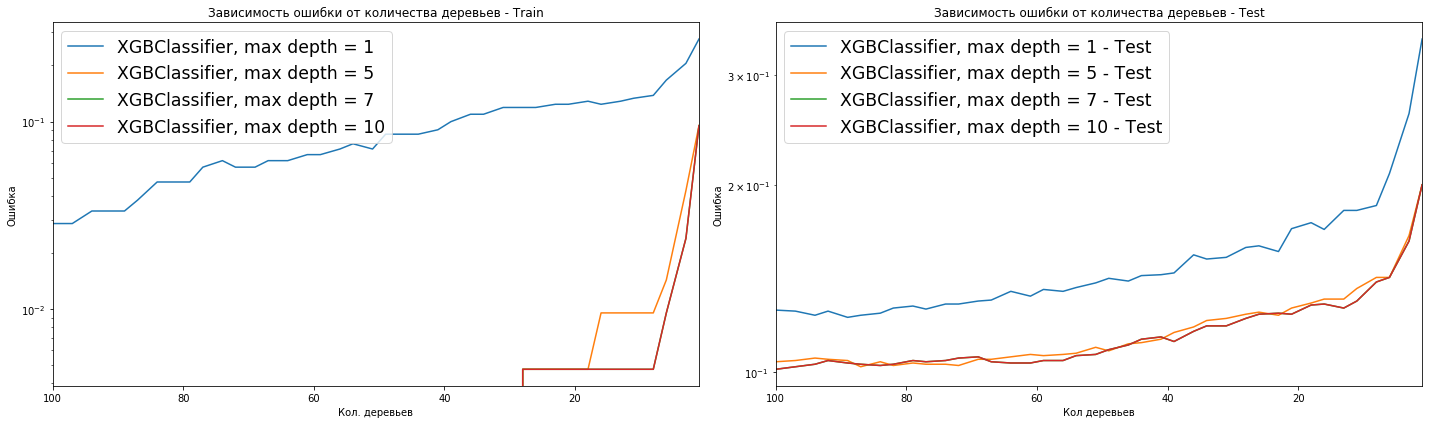

In [74]:
fig = plt.figure(figsize=(20,6))

ax = fig.add_subplot(121)

for label, clf_err in train_rate.items():
    xs, ys = zip(*clf_err)
    ax.plot(xs, ys, label=label)
    print("Минимум Train ", label, "  ", min(ys))

    
ax.set_title("Зависимость ошибки от количества деревьев - Train")
ax.set_xlabel("Кол. деревьев")
ax.set_ylabel("Ошибка")
ax.set_xlim([np.max(estimators_array), np.min(estimators_array)])
ax.legend(loc="upper left", fontsize='xx-large')
ax.set_yscale('log')

print()

ax = fig.add_subplot(122)
for label, clf_err in test_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label + ' - Test')
    print("Минимум Test ", label, "  ", min(ys))

    
ax.set_title("Зависимость ошибки от количества деревьев - Test")
ax.set_xlabel("Кол деревьев")
ax.set_ylabel("Ошибка")
ax.set_xlim([np.max(estimators_array), np.min(estimators_array)])
ax.legend(loc="upper left", fontsize='xx-large')
ax.set_yscale('log')

plt.tight_layout() 

Ну с пенечком и тут все хуже всех. Однако, алгоритм все же продолжает сходиться к высокой точности, но намного медленнее, если взять чуть больше глубину... А так видно, что и средней глубины достаточно, а при увеличении, особо разницы не наблюдается. 

На последок, посмотрим сами алгоритмы построяения деревьев. Главный смысл - построить быстрее. Я устанавливал до этого метод exact. Это жадный, но самый точный алгоритм. Он хорошо тут и быстро отработал, поскольу тренировочный датасет у меня относительно маленький. Посмотрим на результат работы еще одного из метода с использованием апроксимаций с использованием гистограмм.

In [75]:
learning_rate = 0.5
lambda_reg = 0.1

params = {'silent': 1}

params["eta"] = learning_rate
params["lambda"] = lambda_reg
params["predictor"] = "cpu_predictor"
params["min_child_weight"] = 1
params["objective"] = "multi:softmax"

ensemble_clfs = [
    ("XGBClassifier, exact",
        xgb.XGBClassifier(
                tree_method = "exact",
                subsample=0.85,
                max_depth = 5,
                random_state=RANDOM_STATE,
                **params)
    ),
    ("XGBClassifier, hist",
        xgb.XGBClassifier(
                tree_method = "hist",
                subsample = 0.85,
                max_depth = 5,
                random_state=RANDOM_STATE,
                **params)
    ),
]

estimators_array = np.linspace(1, 200, 20, dtype=int)
train_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)
test_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

for label, model in ensemble_clfs:
    for i in estimators_array:
        model.set_params(n_estimators=i)
        model.fit(data_train, label_train)
        
        train_error = 1 - model.score(data_train, label_train)
        train_rate[label].append((i, train_error))
        
        test_error = 1 - model.score(data_test, label_test)
        test_rate[label].append((i, test_error))

[17:04:57] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[17:04:57] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[17:04:58] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[17:04:58] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[17:04:59] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[17:04:59] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[17:05:00] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[17:05:00] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[17:05:01] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[17:05:02] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[17:05:03] Tree meth

Минимум Train  XGBClassifier, exact    0.0
Минимум Train  XGBClassifier, hist    0.0

Минимум Test  XGBClassifier, exact    0.10142857142857142
Минимум Test  XGBClassifier, hist    0.10761904761904761


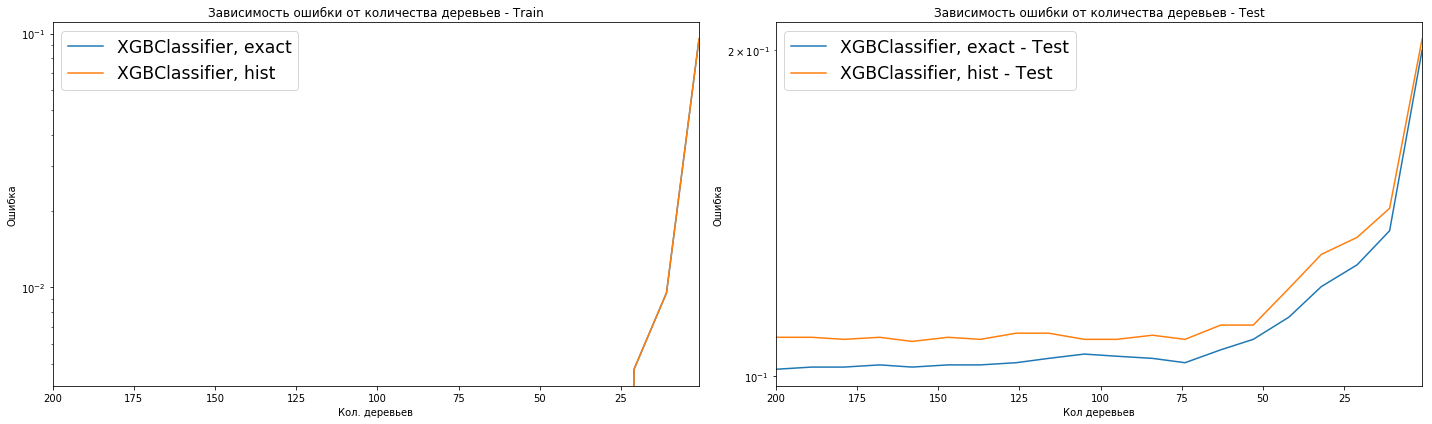

In [76]:
fig = plt.figure(figsize=(20,6))

ax = fig.add_subplot(121)

for label, clf_err in train_rate.items():
    xs, ys = zip(*clf_err)
    ax.plot(xs, ys, label=label)
    print("Минимум Train ", label, "  ", min(ys))

    
ax.set_title("Зависимость ошибки от количества деревьев - Train")
ax.set_xlabel("Кол. деревьев")
ax.set_ylabel("Ошибка")
ax.set_xlim([np.max(estimators_array), np.min(estimators_array)])
ax.legend(loc="upper left", fontsize='xx-large')
ax.set_yscale('log')

print()

ax = fig.add_subplot(122)
for label, clf_err in test_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label + ' - Test')
    print("Минимум Test ", label, "  ", min(ys))

    
ax.set_title("Зависимость ошибки от количества деревьев - Test")
ax.set_xlabel("Кол деревьев")
ax.set_ylabel("Ошибка")
ax.set_xlim([np.max(estimators_array), np.min(estimators_array)])
ax.legend(loc="upper left", fontsize='xx-large')
ax.set_yscale('log')

plt.tight_layout() 

Ну собственно ожидаемо, хоть можно убедиться что мы использовали самый точно алгоритм.

Подберем гипер-параметры GridSearchCV на основе вышеполученных графиков.

In [77]:
xgb_hyperparameters = {}
xgb_hyperparameters["n_estimators"] = [40, 52, 64, 74, 80, 100]
xgb_hyperparameters["max_depth"] = [3, 5, 7, 10]
xgb_hyperparameters["subsample"] = [0.5, 0.6, 0.7]

estimation = xgb.XGBClassifier(tree_method="exact", objective ="multi:softmax", min_child_weight=1,
                               learning_rate=0.5, reg_lambda=0.1)

model_xgb = GridSearchCV(estimation, xgb_hyperparameters, cv=10)
model_xgb.fit(data_train, label_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.5, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softmax', random_state=0,
       reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1, tree_method='exact'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [40, 52, 64, 74, 80, 100], 'max_depth': [3, 5, 7, 10], 'subsample': [0.5, 0.6, 0.7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [78]:
print('Ошибка на обучающей выборки', 1 - model_xgb.score(data_train, label_train))
print('Ошибка на тренировке ', 1 - model_xgb.score(data_test, label_test))

Ошибка на обучающей выборки 0.0
Ошибка на тренировке  0.1138095238095238


In [79]:
model_xgb.best_params_

{'max_depth': 7, 'n_estimators': 100, 'subsample': 0.5}

В целом, GBT показывал стабильные и хорошие результаты, но леса, в частности алгоритм Extremely Randomized Trees все-же отработал намного лучше. Хуже всех из алгоритмов показал себя AdaBoost ну и ладно, всё равно менее популярный. 

## Лабораторная 4. PCA

Ранее я для своего датаеста уже использовал небольшой анализ и применение алгоритма PCA, поэтому в этой части, взял другой датасет: **HIGGS**. Я его выбрал с простой логикой: он очень большой (есть возможность продемострировать время выполнения различных алгоритмов (SVD/через поиск собственных векторов и значений в корреляционной матрице) и его не надо обрабатывать (данные уже представлены численно).

Более того, на последней лабе покажу хорошую библиотеку **DAAL** (Data Analytics Acceleration Library)

In [80]:
import daal4py as d4p
from sklearn import preprocessing

In [134]:
data = pd.read_csv('../../dataset/higgs_train1m.csv', sep = ',', engine = 'python', header=None)

In [135]:
y_train = np.ascontiguousarray(data[data.columns[-1]].values, dtype=np.float64).reshape((len(data), 1))
X_train = np.ascontiguousarray(data.drop(columns=data.columns[-1]).values, dtype=np.float64)
X_train = preprocessing.StandardScaler(copy=False).fit_transform(X_train)

print(X_train.shape)
print(y_train.shape)

(1000000, 28)
(1000000, 1)


In [136]:
data = pd.read_csv('../../dataset/higgs_test500k.csv', sep = ',', engine = 'python', header=None)

In [137]:
y_test = np.ascontiguousarray(data[data.columns[-1]].values, dtype=np.float64).reshape((len(data), 1))
X_test = np.ascontiguousarray(data.drop(columns=data.columns[-1]).values, dtype=np.float64)
X_test = preprocessing.StandardScaler(copy=False).fit_transform(X_test)

print(X_test.shape)
print(y_test.shape)

(500000, 28)
(500000, 1)


Ну для примера возьмем среднее количество компенент

In [112]:
n_components = 14

Пробуем применить алгоритм PCA с помощью SVD:

In [113]:
%%time
algorithm = d4p.pca(method='svdDense', nComponents=n_components)
pca_res = algorithm.compute(X_train)

Wall time: 692 ms


И через вычислении матрицы корреляции и нахождения собственных векторов с собственными значениями:

In [114]:
%%time
algorithm = d4p.pca(method='defaultDense', nComponents=n_components)
pca_res = algorithm.compute(X_train)

Wall time: 210 ms


Тут получили явную разницу между по времени между двумя разными алгоритмами. В **3.2 раз** решение в "лоб" через умножение матриц получилось быстрее. Ну это вызвано я полагаю соотношением количества строк к количеству столбцов. Если бы количество строк было на порядок меньше или кол. столбцов на порядок больше, получили бы возожно другие результаты. Хоть сложность казалось бы у SVD меньше, но с учетом небольшого количества столбцов, SVD во много раз проигрывает.

Проверим на адекватность результат:

In [115]:
train_algo = d4p.decision_tree_classification_training(nClasses=2, maxTreeDepth=14, pruning='none')
model = train_algo.compute(X_train, y_train, None, None).model

In [116]:
predict_alg = d4p.decision_tree_classification_prediction(nClasses=2)
y_pred = predict_alg.compute(X_train, model).prediction

In [117]:
print(1 - np.mean(y_pred == y_train))

0.266108


In [118]:
predict_alg = d4p.decision_tree_classification_prediction(nClasses=2)
y_pred = predict_alg.compute(X_test, model).prediction

In [119]:
print(1 - np.mean(y_pred == y_test))

0.29303999999999997


Для этого датасета годиться. По перебираем теперь компоненты

In [120]:
n_components = np.array([1, 2, 5, 10, 15, 20, 22, 24, 26, 27, 28])
train_rate = []
test_rate = []

for n_component in n_components:
    algorithm = d4p.pca(resultsToCompute = "mean|variance", nComponents=n_component)
    pca_res = algorithm.compute(X_train)
    
    pcatrans_algo = d4p.pca_transform(nComponents=n_component)
    X_train_part = pcatrans_algo.compute(X_train, pca_res.eigenvectors, pca_res.dataForTransform).transformedData
    pcatrans_algo = d4p.pca_transform(nComponents=n_component)
    X_test_part = pcatrans_algo.compute(X_test, pca_res.eigenvectors, pca_res.dataForTransform).transformedData
    
    train_algo = d4p.decision_tree_classification_training(nClasses=2, maxTreeDepth=14, pruning='none')
    model = train_algo.compute(X_train_part, y_train, None, None).model
    
    predict_alg = d4p.decision_tree_classification_prediction(nClasses=2)
    y_pred = predict_alg.compute(X_train_part, model).prediction
    
    error_train = 1 - np.mean(y_pred == y_train)
    train_rate.append(error_train)
    
    predict_alg = d4p.decision_tree_classification_prediction(nClasses=2)
    y_pred = predict_alg.compute(X_test_part, model).prediction
    
    error_test = 1 - np.mean(y_pred == y_test)
    test_rate.append(error_test)

Минимум в тренировочной выборке  0.291775  Минимум в тестовой выборке  0.323426
Оптимальное количество компонент [28]


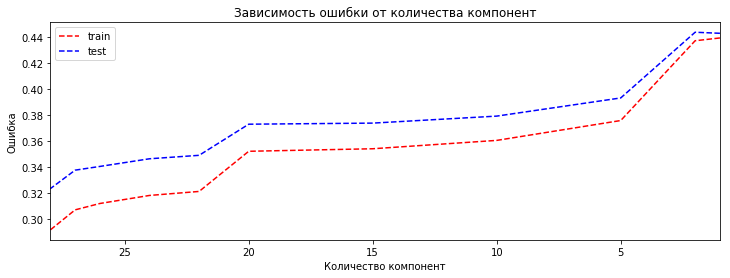

In [121]:
plt.figure(figsize=(12,4))
plt.plot(n_components, train_rate, color='red', linestyle='dashed', label = 'train')
plt.plot(n_components, test_rate, color='blue', linestyle='dashed', label = 'test')

plt.title("Зависимость ошибки от количества компонент")
plt.xlabel("Количество компонент")
plt.ylabel("Ошибка")
plt.xlim([np.max(n_components), np.min(n_components)])
plt.legend()

print("Минимум в тренировочной выборке ", min(train_rate), " Минимум в тестовой выборке ", min(test_rate))
component_opt = n_components[test_rate == min(test_rate)]
print("Оптимальное количество компонент", component_opt)

Что интересно? Как оказалось, оптимальное количесво компонент осталось равным количеству исходных признаков. Почему так могло быть? Посмотрим на матрицу корреляции:

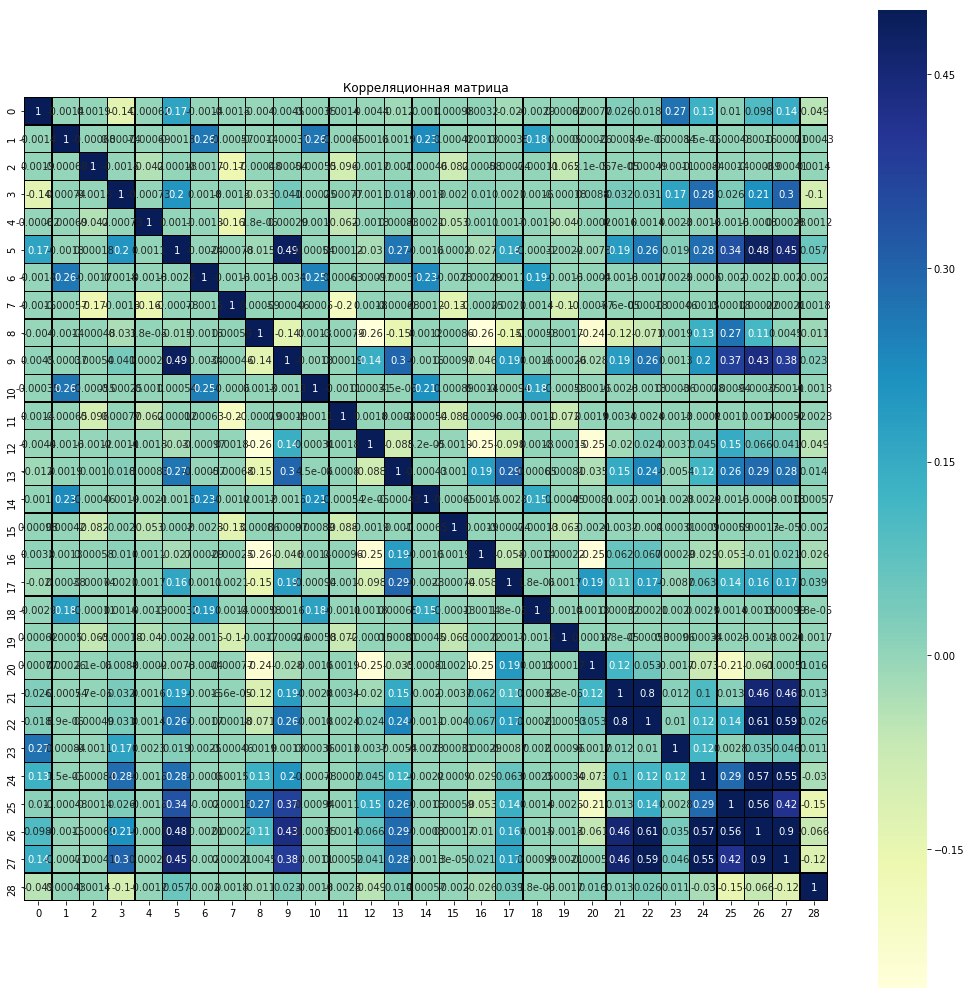

In [140]:
f, ax = plt.subplots(figsize=(18,18))
plt.title('Корреляционная матрица')
sns.heatmap(np.corrcoef(data.T), linewidths=0.25, vmax=0.5, square=True,
           cmap="YlGnBu", linecolor='black', annot=True)

Видно, что сильно коррелирующих признаков очень мало, не удивительно, почему при уменьшении компонент уменьшается точность :)

Ну чтобы убедиться, в том, что действительно алгоритм хорош, а датасет который только что посмотрели, действительно не стоит уменьшать в размерности, посмотрим на первоначальном датасете как поведет себя алгоритм PCA.

In [123]:
data = pd.read_csv('../../dataset/segmentation_train.data', sep = ',', engine = 'python')
data = data.drop(['REGION-PIXEL-COUNT'], axis=1)
data['CLASSES'] = [replace_map_comp[elem] for elem in data['CLASSES'].values]

In [124]:
y_train = np.ascontiguousarray(data[data.columns[0]].values, dtype=np.float64).reshape((len(data), 1))
X_train = np.ascontiguousarray(data.drop(columns=data.columns[0]).values, dtype=np.float64)
X_train = preprocessing.StandardScaler(copy=False).fit_transform(X_train)

In [125]:
print(X_train.shape)
print(y_train.shape)

(210, 18)
(210, 1)


In [126]:
data = pd.read_csv('../../dataset/segmentation_test.data', sep = ',', engine = 'python', header=None)
data = data.drop([3], axis=1)
data[0] = [replace_map_comp[elem] for elem in data[0].values]

In [127]:
y_test = np.ascontiguousarray(data[data.columns[0]].values, dtype=np.float64).reshape((len(data), 1))
X_test = np.ascontiguousarray(data.drop(columns=data.columns[0]).values, dtype=np.float64)
X_test = preprocessing.StandardScaler(copy=False).fit_transform(X_test)

In [128]:
print(X_test.shape)
print(y_test.shape)

(2100, 18)
(2100, 1)


In [129]:
n_components = np.arange(1,19)
n_classes = 7
train_rate = []
test_rate = []

for n_component in n_components:
    algorithm = d4p.pca(resultsToCompute = "mean|variance", nComponents=n_component)
    pca_res = algorithm.compute(X_train)
    
    pcatrans_algo = d4p.pca_transform(nComponents=n_component)
    X_train_part = pcatrans_algo.compute(X_train, pca_res.eigenvectors, pca_res.dataForTransform).transformedData
    pcatrans_algo = d4p.pca_transform(nComponents=n_component)
    X_test_part = pcatrans_algo.compute(X_test, pca_res.eigenvectors, pca_res.dataForTransform).transformedData
    
    train_algo = d4p.decision_tree_classification_training(nClasses=n_classes, maxTreeDepth=14, pruning='none')
    model = train_algo.compute(X_train_part, y_train, None, None).model
    
    predict_alg = d4p.decision_tree_classification_prediction(nClasses=n_classes)
    y_pred = predict_alg.compute(X_train_part, model).prediction
    
    error_train = 1 - np.mean(y_pred == y_train)
    train_rate.append(error_train)
    
    predict_alg = d4p.decision_tree_classification_prediction(nClasses=n_classes)
    y_pred = predict_alg.compute(X_test_part, model).prediction
    
    error_test = 1 - np.mean(y_pred == y_test)
    test_rate.append(error_test)

Минимум в тренировочной выборке  0.0  Минимум в тестовой выборке  0.14095238095238094
Оптимальное количество компонент [8 9]


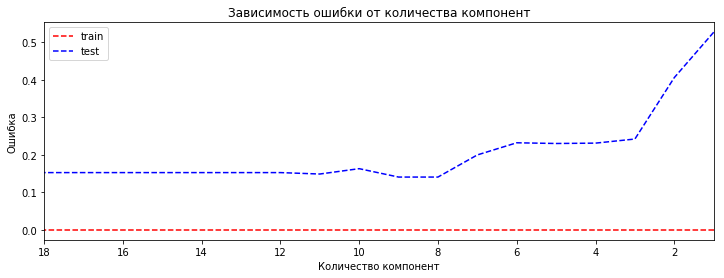

In [130]:
plt.figure(figsize=(12,4))
plt.plot(n_components, train_rate, color='red', linestyle='dashed', label = 'train')
plt.plot(n_components, test_rate, color='blue', linestyle='dashed', label = 'test')

plt.title("Зависимость ошибки от количества компонент")
plt.xlabel("Количество компонент")
plt.ylabel("Ошибка")
plt.xlim([np.max(n_components), np.min(n_components)])
plt.legend()

print("Минимум в тренировочной выборке ", min(train_rate), " Минимум в тестовой выборке ", min(test_rate))
component_opt = n_components[test_rate == min(test_rate)]
print("Оптимальное количество компонент", component_opt)

Па-пам, очевидно, что большое количество признаков не играет никакой роли, даже есть компоненты, где ошибка меньше... Ну дерево это не серьёзно. Давайте посмотрим на топовом классификаторе, как поведут себя компоненты :)

In [131]:
n_components = np.arange(1,19)
n_classes = 7
train_rate = []
test_rate = []

for n_component in n_components:
    algorithm = d4p.pca(resultsToCompute = "mean|variance", nComponents=n_component)
    pca_res = algorithm.compute(X_train)
    
    pcatrans_algo = d4p.pca_transform(nComponents=n_component)
    X_train_part = pcatrans_algo.compute(X_train, pca_res.eigenvectors, pca_res.dataForTransform).transformedData
    pcatrans_algo = d4p.pca_transform(nComponents=n_component)
    X_test_part = pcatrans_algo.compute(X_test, pca_res.eigenvectors, pca_res.dataForTransform).transformedData
    
    
    train_algo = d4p.gbt_classification_training(nClasses=n_classes, maxIterations=100, minObservationsInLeafNode=4)
    model = train_algo.compute(X_train_part, y_train).model
    
    predict_alg = d4p.gbt_classification_prediction(nClasses=n_classes)
    y_pred = predict_alg.compute(X_train_part, model).prediction
    
    error_train = 1 - np.mean(y_pred == y_train)
    train_rate.append(error_train)
    
    predict_alg = d4p.gbt_classification_prediction(nClasses=n_classes)
    y_pred = predict_alg.compute(X_test_part, model).prediction
    
    error_test = 1 - np.mean(y_pred == y_test)
    test_rate.append(error_test)

Минимум в тренировочной выборке  0.0  Минимум в тестовой выборке  0.11142857142857143
Оптимальное количество компонент [8 9]


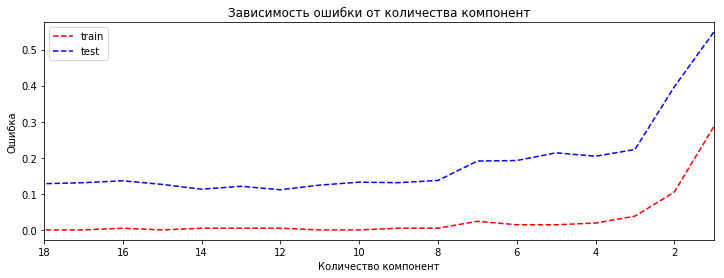

In [132]:
plt.figure(figsize=(12,4))
plt.plot(n_components, train_rate, color='red', linestyle='dashed', label = 'train')
plt.plot(n_components, test_rate, color='blue', linestyle='dashed', label = 'test')

plt.title("Зависимость ошибки от количества компонент")
plt.xlabel("Количество компонент")
plt.ylabel("Ошибка")
plt.xlim([np.max(n_components), np.min(n_components)])
plt.legend()

print("Минимум в тренировочной выборке ", min(train_rate), " Минимум в тестовой выборке ", min(test_rate))
print("Оптимальное количество компонент", component_opt)

Картина получилась схожей, но более наглядно то, что при небольшом уменьшении компонент, ошибка уменшалась. Оба экперимента подсказывают взять 8-9 компонент. Но ранее я взял 11 компонент, чтобы быть более уверенным, что лишнее неоткину.

Можно сделать вывод, что в самом начале уменьшение моего исходного датасета была правильной идеей. :) 